<a href="https://colab.research.google.com/github/Tere-hdz/Analitica-Datos/blob/main/Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 1**

Teresa Hernández Cid

##**Ciudad 1: México**

###Importación de Librerías y Creación de Df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df=pd.read_excel('listingsm.xlsx')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20220922013610,2022-09-22,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,783480,https://www.airbnb.com/rooms/783480,20220922013610,2022-09-22,city scrape,"Area Sta.Fe,IberoABC Hospital Rooms",<b>The space</b><br />Two beautifully furnishe...,The neighborhood is very quiet. There are smal...,https://a0.muscache.com/pictures/12600230/eec8...,4129056,...,4.93,4.70,4.85,NaN,t,2,0,2,0,0.26
2,796477,https://www.airbnb.com/rooms/796477,20220922013610,2022-09-23,city scrape,Classic but Modern Apartment in Condesa,Spacious and comfortable room on historic buil...,Condesa is surrounded by important museums and...,https://a0.muscache.com/pictures/58251607/70e9...,4195771,...,4.91,4.96,4.71,NaN,f,1,0,1,0,1.52
3,44616,https://www.airbnb.com/rooms/44616,20220922013610,2022-09-23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.75,4.98,4.47,NaN,f,12,3,2,0,0.44
4,817291,https://www.airbnb.com/rooms/817291,20220922013610,2022-09-22,city scrape,Live Mexico City Like a Small Town,"Beautiful and cozy apartment in Mexico City, w...",Please check the guidebook. We have posted man...,https://a0.muscache.com/pictures/556d81f5-5aef...,4017148,...,4.95,4.63,4.78,NaN,f,1,1,0,0,0.51



###**Preprocesamiento**

* Nulos

In [ ]:
#Eliminamos las variables que no son de nuestro interés
df=df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],axis=1)
df.head()


,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,NaN,Entire home/apt,4001.0,363,0,NaN,NaN,NaN
1,1.00,Private room,500.0,363,27,4.96,4.93,4.93
2,0.67,Private room,599.0,323,144,4.73,4.70,4.91
3,0.79,Entire home/apt,18000.0,331,58,4.59,4.70,4.75
4,1.00,Entire home/apt,740.0,314,61,4.85,4.80,4.95


In [ ]:
df.info()                #Observamos que tenemos nulos, vamos a cambiarlos por las medias de esas filas. 
df=df.fillna({'host_acceptance_rate':int(df['host_acceptance_rate'].mean()),'review_scores_rating':int(df['review_scores_rating'].mean()),'review_scores_cleanliness':int(df['review_scores_cleanliness'].mean()),'review_scores_communication':int(df['review_scores_communication'].mean())})
print(len(df)-df.count())                #Confirmamos que no tenemos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         20483 non-null  float64
 1   room_type                    22948 non-null  object 
 2   price                        22948 non-null  float64
 3   availability_365             22948 non-null  int64  
 4   number_of_reviews            22948 non-null  int64  
 5   review_scores_rating         18881 non-null  float64
 6   review_scores_cleanliness    18787 non-null  float64
 7   review_scores_communication  18787 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.4+ MB
host_acceptance_rate           0
room_type                      0
price                          0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_commu

Creación de DaraFrames

* Outliers.

Observando el box plot nos percatamos que no tenemos valores atípicos más que en la variable de precio,y al tratarse de una variable que puede variar los precios dependiendo el tipo de cuarto, vamos a omitir estos datos, y trabajremos con el dataset normal.  

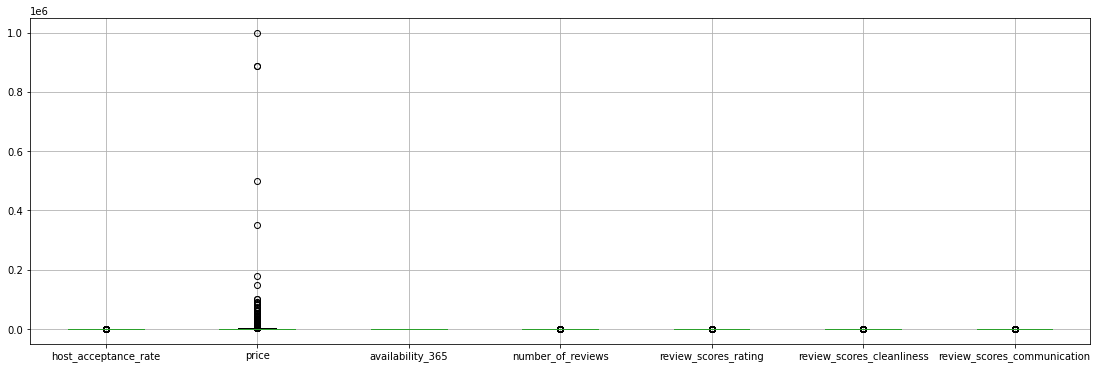

In [ ]:
df.boxplot(figsize=(19,6))

In [ ]:
#Creamos los 4 Dt de acuerdo al tipo de cuarto. 
apt=df[df['room_type'] == "Entire home/apt"] 
private=df[df['room_type'] == "Private room"] 
hotel=df[df['room_type'] == "Hotel room"] 
shared=df[df['room_type'] == "Shared room"] 


In [ ]:
#ENTIRE HOUSE/APT
dfm2=df.copy()
y=dfm2
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
dfm3= dfm2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
print(dfm3.head())
dfm=dfm3.copy()
dfm=df.fillna(round(dfm3.mean(),1))
dfm=dfm.drop('room_type',axis=1)
print(len(dfm)-dfm.count()) #Numero de nulos

Limite superior permitido host_acceptance_rate              1.255
price                          2975.000
availability_365                672.500
number_of_reviews                91.000
review_scores_rating              5.850
review_scores_cleanliness         5.900
review_scores_communication       5.750
dtype: float64
Limite inferior permitido host_acceptance_rate             0.575
price                         -985.000
availability_365              -179.500
number_of_reviews              -53.000
review_scores_rating             3.450
review_scores_cleanliness        3.420
review_scores_communication      3.750
dtype: float64
   host_acceptance_rate room_type  price  availability_365  number_of_reviews  \
0                   NaN       NaN    NaN               363                0.0   
1                  1.00       NaN  500.0               363               27.0   
2                  0.67       NaN  599.0               323                NaN   
3                  0.79       NaN    NaN 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


In [ ]:
#Comprobación que no tengo outliers/nulos.
print(private.info())
print(shared.info())
print(apt.info())
print(hotel.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 22944
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         8316 non-null   float64
 1   room_type                    8316 non-null   object 
 2   price                        8316 non-null   float64
 3   availability_365             8316 non-null   int64  
 4   number_of_reviews            8316 non-null   int64  
 5   review_scores_rating         8316 non-null   float64
 6   review_scores_cleanliness    8316 non-null   float64
 7   review_scores_communication  8316 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 584.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 138 to 22943
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance

###**Correlaciones y Gráficos**

ENTIRE HOME/ APT

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=apt[[i]] #para que sea df, no lista
  Var_Dep=apt['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print() 

Coeficiente de determinación de:  availability_365
0.0016
Coeficiente de correlación: 
0.0405

Coeficiente de determinación de:  review_scores_rating
0.0343
Coeficiente de correlación: 
0.1851

Coeficiente de determinación de:  price
0.0003
Coeficiente de correlación: 
0.0177

Coeficiente de determinación de:  host_acceptance_rate
0.0212
Coeficiente de correlación: 
0.1456

Coeficiente de determinación de:  review_scores_cleanliness
0.0405
Coeficiente de correlación: 
0.2014

Coeficiente de determinación de:  review_scores_communication
0.0466
Coeficiente de correlación: 
0.2159



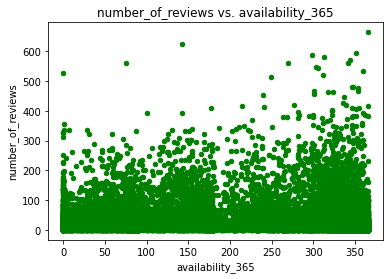

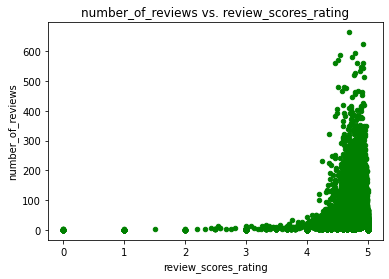

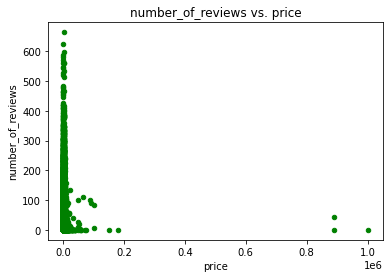

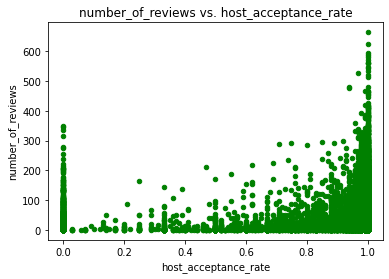

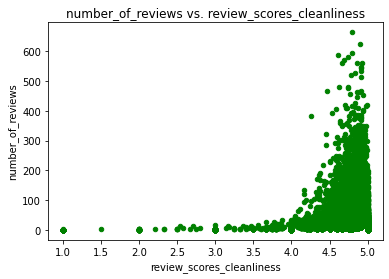

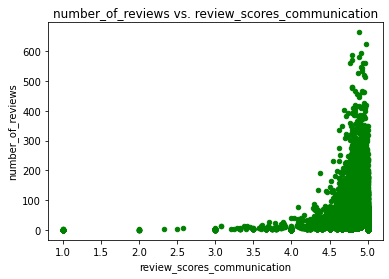

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  apt.plot.scatter(x=i,y='number_of_reviews',c='green')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)


PRIVATE ROOM

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=private[[i]] #para que sea df, no lista
  Var_Dep=private['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.0013
Coeficiente de correlación: 
0.0366

Coeficiente de determinación de:  review_scores_rating
0.034
Coeficiente de correlación: 
0.1845

Coeficiente de determinación de:  price
0.0004
Coeficiente de correlación: 
0.0197

Coeficiente de determinación de:  host_acceptance_rate
0.0392
Coeficiente de correlación: 
0.1981

Coeficiente de determinación de:  review_scores_cleanliness
0.0427
Coeficiente de correlación: 
0.2066

Coeficiente de determinación de:  review_scores_communication
0.0438
Coeficiente de correlación: 
0.2094



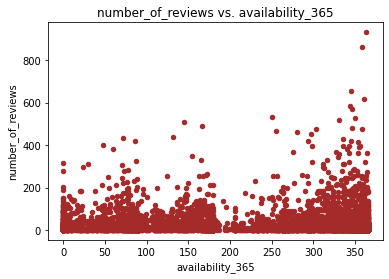

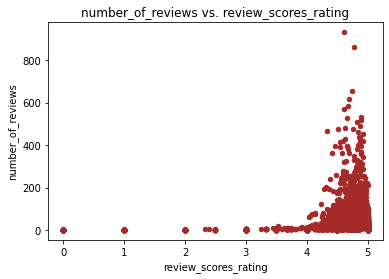

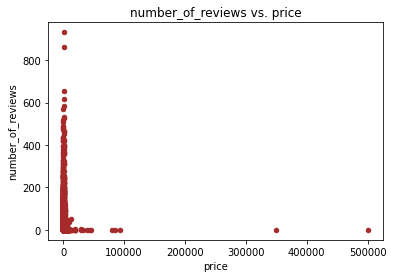

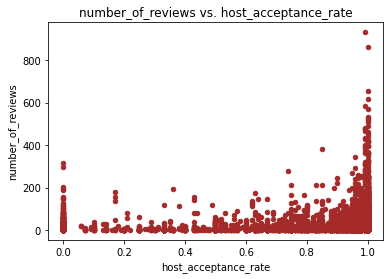

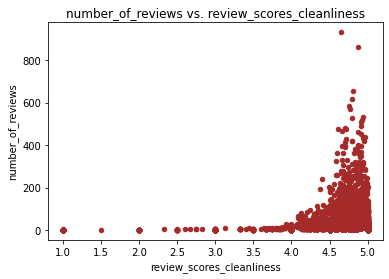

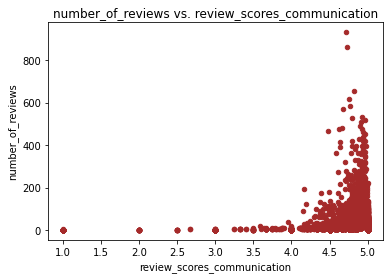

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  private.plot.scatter(x=i,y='number_of_reviews',c='brown')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)


HOTEL

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=hotel[[i]] #para que sea df, no lista
  Var_Dep=hotel['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.0056
Coeficiente de correlación: 
0.0749

Coeficiente de determinación de:  review_scores_rating
0.0494
Coeficiente de correlación: 
0.2224

Coeficiente de determinación de:  price
0.005
Coeficiente de correlación: 
0.0707

Coeficiente de determinación de:  host_acceptance_rate
0.0325
Coeficiente de correlación: 
0.1803

Coeficiente de determinación de:  review_scores_cleanliness
0.0412
Coeficiente de correlación: 
0.2029

Coeficiente de determinación de:  review_scores_communication
0.0516
Coeficiente de correlación: 
0.2273



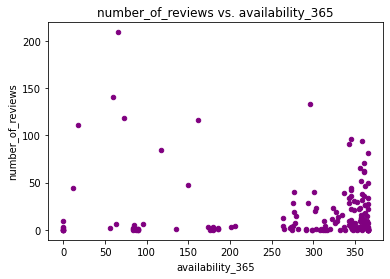

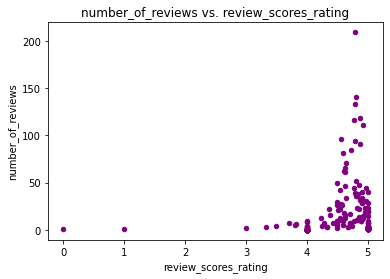

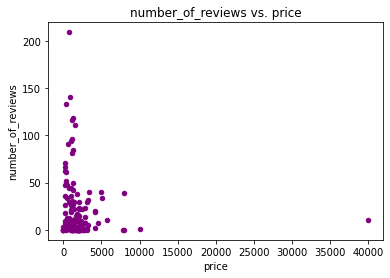

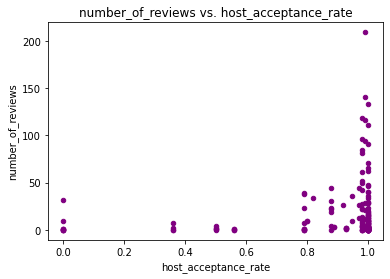

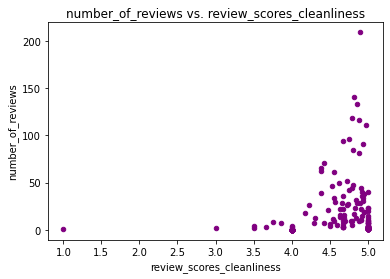

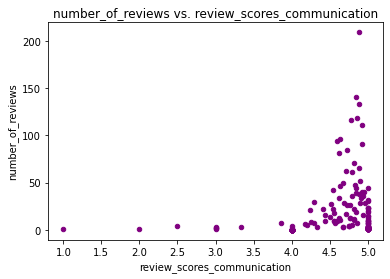

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  hotel.plot.scatter(x=i,y='number_of_reviews',c='purple')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)

SHARED ROOM

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=shared[[i]] #para que sea df, no lista
  Var_Dep=shared['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.0022
Coeficiente de correlación: 
0.0467

Coeficiente de determinación de:  review_scores_rating
0.0419
Coeficiente de correlación: 
0.2047

Coeficiente de determinación de:  price
0.0056
Coeficiente de correlación: 
0.0745

Coeficiente de determinación de:  host_acceptance_rate
0.0535
Coeficiente de correlación: 
0.2313

Coeficiente de determinación de:  review_scores_cleanliness
0.0501
Coeficiente de correlación: 
0.2238

Coeficiente de determinación de:  review_scores_communication
0.0573
Coeficiente de correlación: 
0.2394



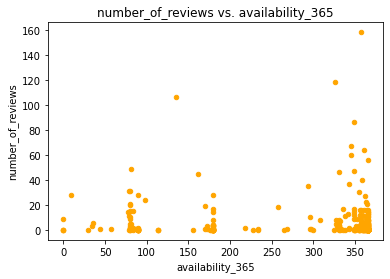

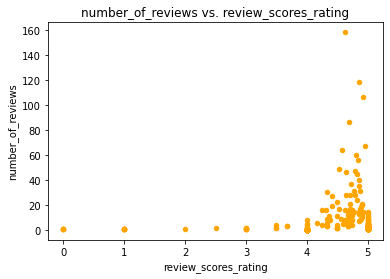

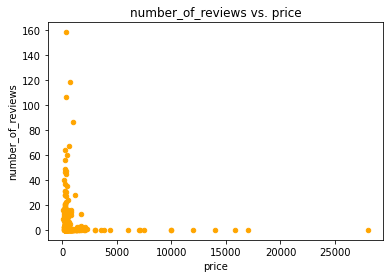

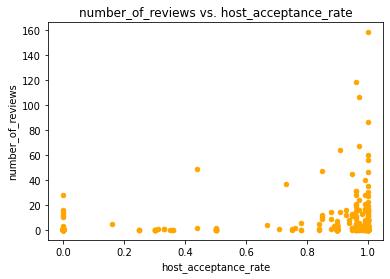

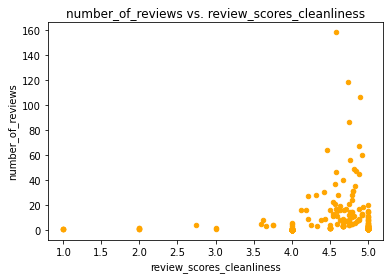

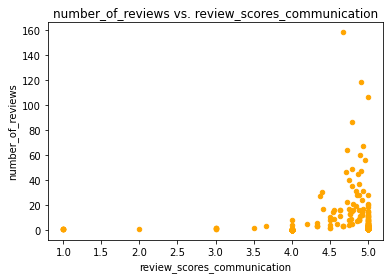

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  shared.plot.scatter(x=i,y='number_of_reviews',c='orange')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)

###**Modelo matemático**

####**Entire Room/apt:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_communication**


**y = 30.82 x-106.3**

y = mx + b

y --> number_of_reviews (dependiente)

m = 30.82

b= -106.3

X --> review_scores_communication (independiente)

In [ ]:
#Modelo matemático para cada df
Vars_Indep=apt[['review_scores_communication']] #para que sea df, no lista
Var_Dep=apt['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=apt[['review_scores_communication']])
apt.insert(0, 'Predicciones', y_pred)
apt.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([30.82053455]), '_residues': 51152471.231172554, 'rank_': 1, 'singular_': array([51.30332421]), 'intercept_': -106.36669333277422}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,16.915445,0.00,Entire home/apt,4001.0,363,0,4.00,4.00,4.00
3,40.030846,0.79,Entire home/apt,18000.0,331,58,4.59,4.70,4.75
4,46.194953,1.00,Entire home/apt,740.0,314,61,4.85,4.80,4.95
5,45.578542,0.92,Entire home/apt,650.0,354,76,4.88,4.92,4.93
6,39.106230,1.00,Entire home/apt,1441.0,319,51,4.45,4.54,4.72


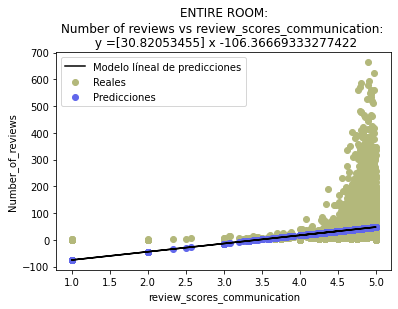

In [ ]:
import matplotlib.pyplot as plt
x=apt['review_scores_communication']
y=apt['number_of_reviews']
z= apt['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='ENTIRE ROOM:\n' +'Number of reviews vs review_scores_communication: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_communication")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.046599381843499765
coeficiente de Correlación 0.21586889966713538


####**SHARED ROOM:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_communication**


**y = 5.62 x-18.3**

y = mx + b

y --> number_of_reviews (dependiente)

m = 5.62

b= -18.3

X --> review_scores_communication (independiente)

In [ ]:
#Modelo matemático para cada df
Vars_Indep=shared[['review_scores_communication']] #para que sea df, no lista
Var_Dep=shared['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=shared[['review_scores_communication']])
shared.insert(0, 'Predicciones', y_pred)
shared.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([5.62358563]), '_residues': 83286.09643145754, 'rank_': 1, 'singular_': array([12.6514151]), 'intercept_': -18.395100834966186}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
138,4.099242,0.00,Shared room,2000.0,365,0,4.00,4.00,4.00
298,4.099242,0.00,Shared room,879.0,365,0,4.00,4.00,4.00
301,9.722827,0.97,Shared room,333.0,135,106,4.93,4.90,5.00
365,9.722827,0.88,Shared room,200.0,349,9,5.00,4.67,5.00
400,8.204459,1.00,Shared room,300.0,363,22,4.50,4.55,4.73


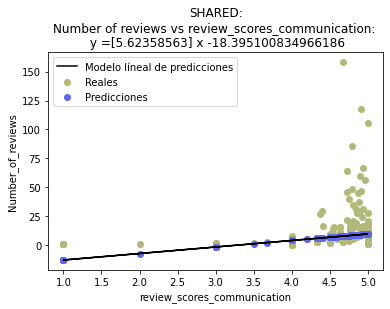

In [ ]:
import matplotlib.pyplot as plt
x=shared['review_scores_communication']
y=shared['number_of_reviews']
z= shared['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='SHARED:\n' + 'Number of reviews vs review_scores_communication: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_communication")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.05729393236207725
coeficiente de Correlación 0.23936150977564719


####**HOTEL:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_communication**


**y = 11.77 x - 35.51**

y = mx + b

y --> number_of_reviews (dependiente)

m = 11.77

b= -35.51

X --> review_scores_communication (independiente)

In [ ]:
#Modelo matemático para cada df
Vars_Indep=hotel[['review_scores_communication']] #para que sea df, no lista
Var_Dep=hotel['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=hotel[['review_scores_communication']])
hotel.insert(0, 'Predicciones', y_pred)
hotel.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([11.77199057]), '_residues': 156294.98442862282, 'rank_': 1, 'singular_': array([7.83723266]), 'intercept_': -35.51332940847256}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
22,23.346623,0.88,Hotel room,1098.0,348,31,4.97,4.94,5.0
24,23.346623,0.00,Hotel room,600.0,364,9,4.89,5.00,5.0
26,23.346623,0.88,Hotel room,998.0,345,44,4.98,4.91,5.0
31,23.346623,0.88,Hotel room,998.0,327,19,4.95,4.95,5.0
45,23.346623,0.79,Hotel room,2860.0,347,7,4.71,5.00,5.0


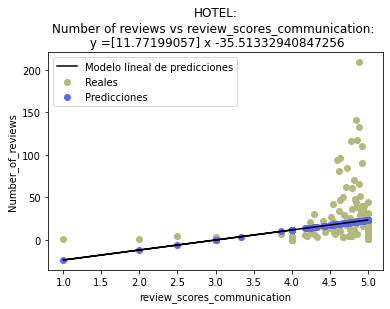

In [ ]:
import matplotlib.pyplot as plt
x=hotel['review_scores_communication']
y=hotel['number_of_reviews']
z= hotel['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='HOTEL:\n' + 'Number of reviews vs review_scores_communication: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_communication")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.05164758319205476
coeficiente de Correlación 0.22726104635870784


####**PRIVATE ROOM:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_communication**


**y = 16.96 x - 55.81**

y = mx + b

y --> number_of_reviews (dependiente)

m = 16.96

b= - 55.81

X --> review_scores_communication (independiente)

In [ ]:
#Modelo matemático para cada df
Vars_Indep=private[['review_scores_communication']] #para que sea df, no lista
Var_Dep=private['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=private[['review_scores_communication']])
private.insert(0, 'Predicciones', y_pred)
private.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([16.96736349]), '_residues': 20009766.984582074, 'rank_': 1, 'singular_': array([56.44557015]), 'intercept_': -55.8114437133534}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
1,27.837658,1.00,Private room,500.0,363,27,4.96,4.93,4.93
2,27.498311,0.67,Private room,599.0,323,144,4.73,4.70,4.91
8,28.177006,0.79,Private room,1198.0,175,58,4.91,4.91,4.95
16,12.058010,0.00,Private room,1360.0,88,0,4.00,4.00,4.00
18,27.667985,0.62,Private room,440.0,297,127,4.73,4.67,4.92


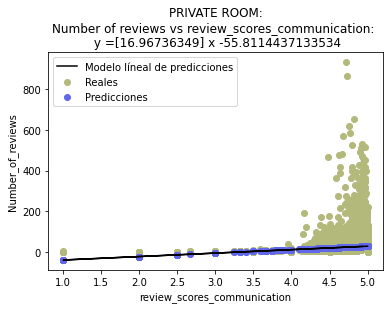

In [ ]:
import matplotlib.pyplot as plt
x=private['review_scores_communication']
y=private['number_of_reviews']
z=private['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='PRIVATE ROOM:\n' + 'Number of reviews vs review_scores_communication: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_communication")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.04383097150324955
coeficiente de Correlación 0.20935847607214175


##**Ciudad 2: Bélgica**

###Importación de Librerías y Creación de Df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
dfb=pd.read_excel('listingsb.xlsx')
dfb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78
3,28871,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92
4,29051,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16



###**Preprocesamiento**

* Nulos y outliers

In [ ]:

dfb=dfb.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],axis=1)
dfb.head()


,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,1.00,Private room,49,14,305,4.89,5.00,4.98
1,0.98,Private room,106,0,339,4.44,4.79,4.62
2,1.00,Private room,136,121,231,4.94,4.95,4.92
3,1.00,Private room,75,117,428,4.88,4.89,4.94
4,1.00,Private room,55,160,582,4.79,4.84,4.92


In [ ]:
dfb.info()                #Observamos que tenemos nulos
dfb=dfb.fillna({'host_acceptance_rate':int(dfb['host_acceptance_rate'].mean()),'review_scores_rating':int(dfb['review_scores_rating'].mean()),'review_scores_cleanliness':int(dfb['review_scores_cleanliness'].mean()),'review_scores_communication':int(dfb['review_scores_communication'].mean())})
print(len(dfb)-dfb.count())                #Confirmamos que no tenemos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         6031 non-null   float64
 1   room_type                    6893 non-null   object 
 2   price                        6893 non-null   int64  
 3   availability_365             6893 non-null   int64  
 4   number_of_reviews            6893 non-null   int64  
 5   review_scores_rating         6247 non-null   float64
 6   review_scores_cleanliness    6242 non-null   float64
 7   review_scores_communication  6242 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 430.9+ KB
host_acceptance_rate           0
room_type                      0
price                          0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_commu

* Outliers.

Observando el box plot nos percatamos que no tenemos valores atípicos más que en las variables de precio,y numero de reviews, y al tratarse de variables que puede variar los precios y reseñas dependiendo el tipo de cuarto, vamos a omitir estos datos, y trabajaremos con el dataset normal.  

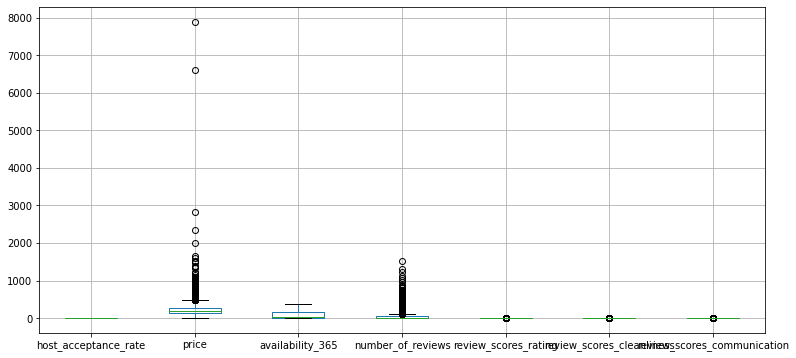

In [ ]:
dfb.boxplot(figsize=(13,6))

In [ ]:
#Creamos los 4 Dt de acuerdo al tipo de cuarto. 
aptb=dfb[dfb['room_type'] == "Entire home/apt"] 
privateb=dfb[dfb['room_type'] == "Private room"] 
hotelb=dfb[dfb['room_type'] == "Hotel room"] 
sharedb=dfb[dfb['room_type'] == "Shared room"] 


###**Correlaciones y Gráficos**

ENTIRE HOME/ APT

In [ ]:

column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=aptb[[i]] #para que sea df, no lista
  Var_Dep=aptb['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print() 

Coeficiente de determinación de:  availability_365
0.0205
Coeficiente de correlación: 
0.1432

Coeficiente de determinación de:  review_scores_rating
0.0062
Coeficiente de correlación: 
0.079

Coeficiente de determinación de:  price
0.0016
Coeficiente de correlación: 
0.0395

Coeficiente de determinación de:  host_acceptance_rate
0.0227
Coeficiente de correlación: 
0.1505

Coeficiente de determinación de:  review_scores_cleanliness
0.0114
Coeficiente de correlación: 
0.1065

Coeficiente de determinación de:  review_scores_communication
0.0123
Coeficiente de correlación: 
0.1111



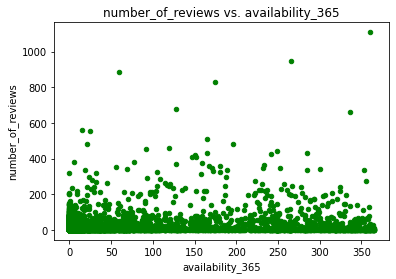

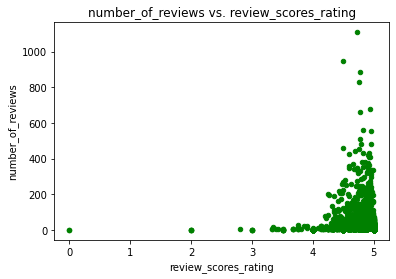

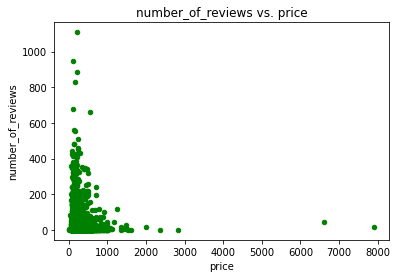

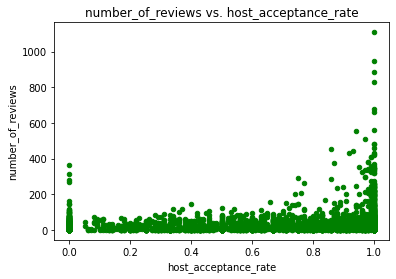

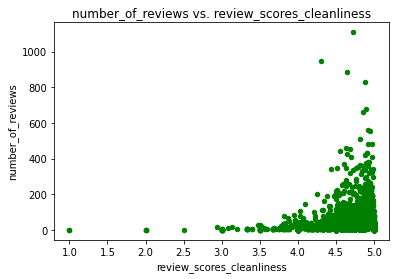

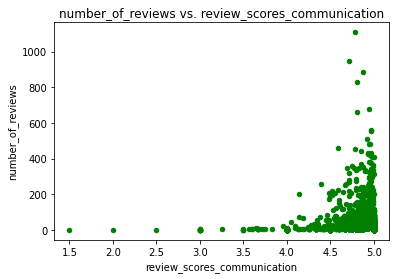

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  aptb.plot.scatter(x=i,y='number_of_reviews',c='green')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)


PRIVATE ROOM

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=privateb[[i]] #para que sea df, no lista
  Var_Dep=privateb['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.0027
Coeficiente de correlación: 
0.0521

Coeficiente de determinación de:  review_scores_rating
0.0235
Coeficiente de correlación: 
0.1534

Coeficiente de determinación de:  price
0.0393
Coeficiente de correlación: 
0.1982

Coeficiente de determinación de:  host_acceptance_rate
0.0277
Coeficiente de correlación: 
0.1663

Coeficiente de determinación de:  review_scores_cleanliness
0.0327
Coeficiente de correlación: 
0.1807

Coeficiente de determinación de:  review_scores_communication
0.0408
Coeficiente de correlación: 
0.202



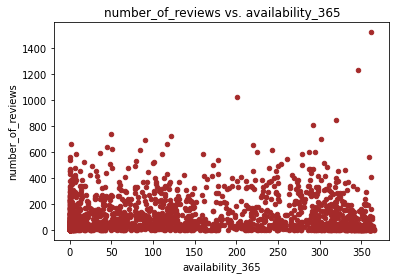

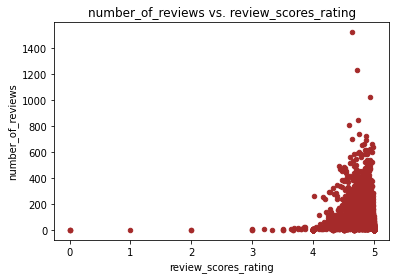

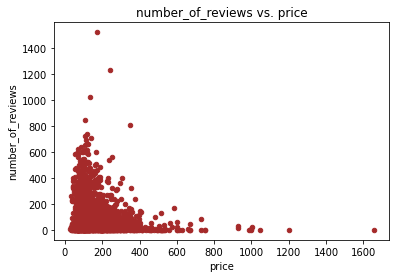

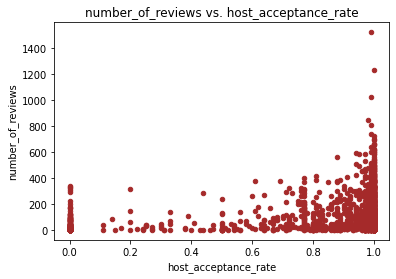

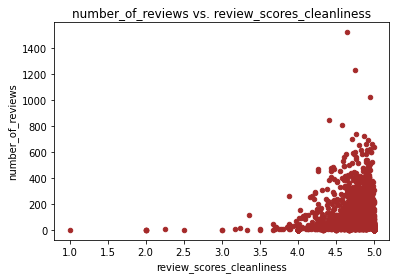

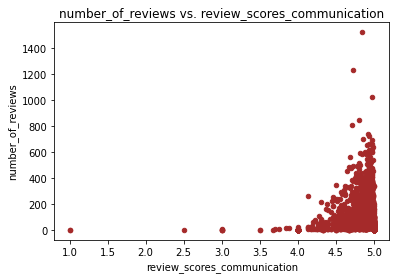

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  privateb.plot.scatter(x=i,y='number_of_reviews',c='brown')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)


HOTEL

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=hotelb[[i]] #para que sea df, no lista
  Var_Dep=hotelb['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.0233
Coeficiente de correlación: 
0.1525

Coeficiente de determinación de:  review_scores_rating
0.0333
Coeficiente de correlación: 
0.1824

Coeficiente de determinación de:  price
0.0072
Coeficiente de correlación: 
0.0849

Coeficiente de determinación de:  host_acceptance_rate
0.0125
Coeficiente de correlación: 
0.112

Coeficiente de determinación de:  review_scores_cleanliness
0.0201
Coeficiente de correlación: 
0.1419

Coeficiente de determinación de:  review_scores_communication
0.0336
Coeficiente de correlación: 
0.1832



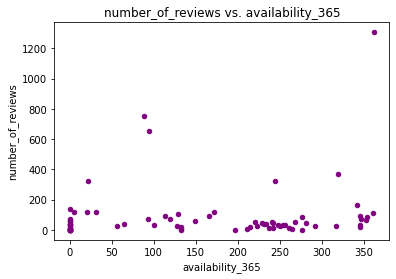

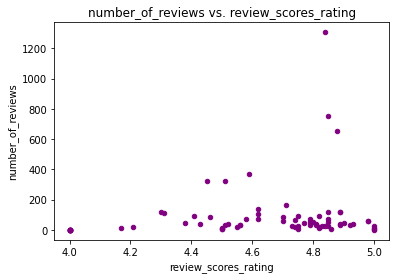

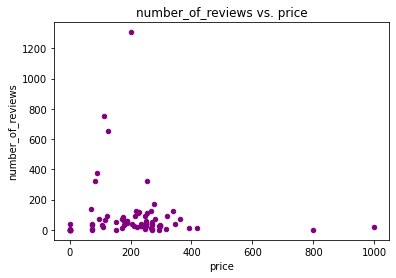

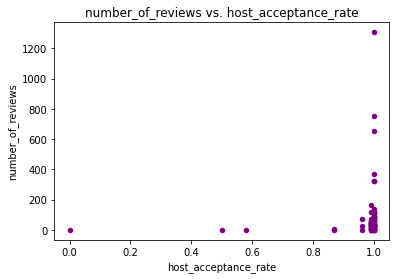

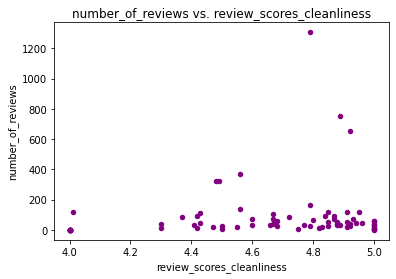

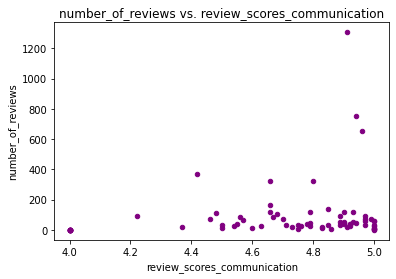

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  hotelb.plot.scatter(x=i,y='number_of_reviews',c='purple')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)

SHARED ROOM

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=sharedb[[i]] #para que sea df, no lista
  Var_Dep=sharedb['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.0859
Coeficiente de correlación: 
0.2932

Coeficiente de determinación de:  review_scores_rating
0.0103
Coeficiente de correlación: 
0.1013

Coeficiente de determinación de:  price
0.0229
Coeficiente de correlación: 
0.1514

Coeficiente de determinación de:  host_acceptance_rate
0.0163
Coeficiente de correlación: 
0.1275

Coeficiente de determinación de:  review_scores_cleanliness
0.0002
Coeficiente de correlación: 
0.0148

Coeficiente de determinación de:  review_scores_communication
0.0015
Coeficiente de correlación: 
0.0387



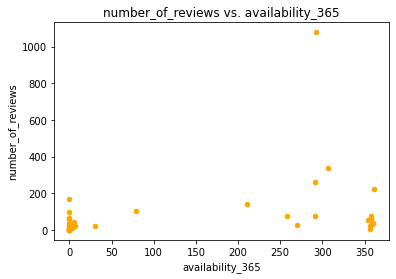

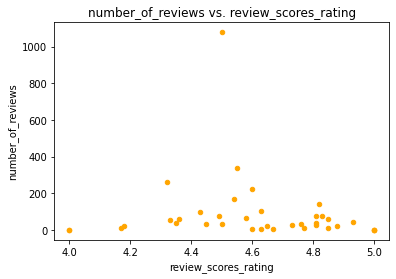

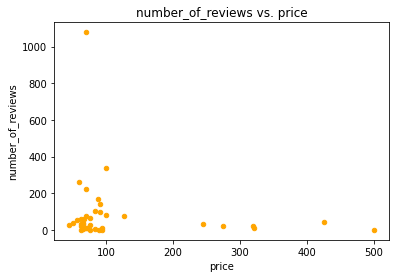

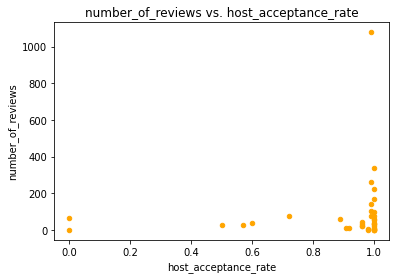

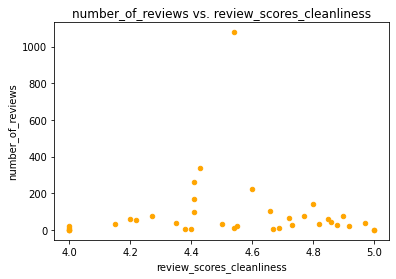

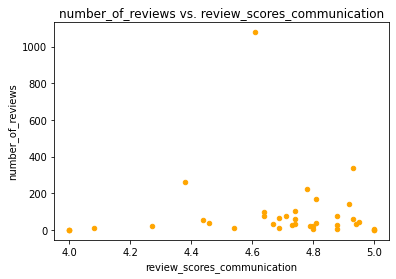

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  sharedb.plot.scatter(x=i,y='number_of_reviews',c='orange')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)

###**Modelo matemático**

####**Entire Room/apt:**
Variables escogidas (mayor correlación) con la cual obtendremos un mayor modelo: **host_acceptance_rate** y **availability_365**


**y = 20.29666616 x^2 +  0.07030515 x + 8.65**



In [ ]:
#Modelo matemático para cada df
Vars_Indep=aptb[['host_acceptance_rate','availability_365']] #para que sea df, no lista
Var_Dep=aptb['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=aptb[['host_acceptance_rate','availability_365']])
aptb.insert(0, 'Predicciones', y_pred)
aptb.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate', 'availability_365'], dtype=object), 'n_features_in_': 2, 'coef_': array([20.29666616,  0.07030515]), '_residues': 15080809.324999953, 'rank_': 2, 'singular_': array([7180.18734404,   26.30013593]), 'intercept_': 8.650672304922402}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
5,28.947338,1.00,Entire home/apt,240,0,44,4.72,4.45,4.90
6,38.923955,0.92,Entire home/apt,245,165,433,4.92,4.91,4.97
8,18.799005,0.50,Entire home/apt,250,0,63,4.95,4.92,4.98
9,9.283419,0.00,Entire home/apt,149,9,95,4.86,4.86,4.98
10,15.348572,0.33,Entire home/apt,120,0,36,4.91,4.88,4.94


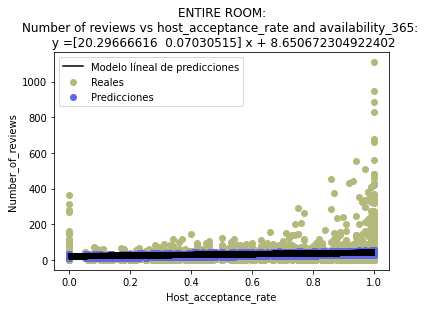

In [ ]:
import matplotlib.pyplot as plt
x=aptb['host_acceptance_rate']
y=aptb['number_of_reviews']
z= aptb['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='ENTIRE ROOM:\n' +'Number of reviews vs host_acceptance_rate and availability_365: \n '+ 'y ='+str(l[7])+' x + '+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("Host_acceptance_rate")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.03867754424911507
coeficiente de Correlación 0.1966660729488314


####**SHARED ROOM:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **price** y **availability_365'**


**y =  0.31084949 x^2 -0.09474766 x + 55.78**


In [ ]:
#Modelo matemático para cada df
Vars_Indep=sharedb[['availability_365','price']] #para que sea df, no lista
Var_Dep=sharedb['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=sharedb[['availability_365','price']]) 
sharedb.insert(0, 'Predicciones', y_pred)
sharedb.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365', 'price'], dtype=object), 'n_features_in_': 2, 'coef_': array([ 0.31084949, -0.09474766]), '_residues': 1109607.1000948995, 'rank_': 2, 'singular_': array([1012.51761558,  587.57170675]), 'intercept_': 55.782689598627115}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
210,141.833466,1.00,Shared room,99,307,340,4.55,4.43,4.93
306,51.045307,0.60,Shared room,50,0,38,4.81,4.97,4.81
961,50.082902,0.92,Shared room,70,3,13,4.85,4.54,4.69
2038,132.605979,0.57,Shared room,75,270,27,4.81,4.88,4.88
2827,136.765127,0.72,Shared room,100,291,79,4.83,4.90,4.88


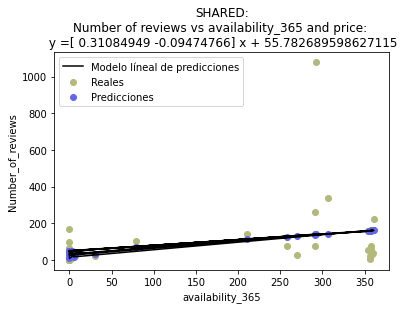

In [ ]:
import matplotlib.pyplot as plt
x=sharedb['availability_365']
y=sharedb['number_of_reviews']
z= sharedb['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='SHARED:\n' + 'Number of reviews vs availability_365 and price: \n '+ 'y ='+str(l[7])+' x + '+ str(l[11])
plt.title(Titulo)
plt.ylabel("Number_of_reviews")
plt.xlabel("availability_365")
plt.legend()
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.08871481173641116
coeficiente de Correlación 0.2978503176704889


####**HOTEL:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_communication** y **review_scores_rating**


**y = 59.13221285 x^2 + 56.86036005 x -449.32**


In [ ]:
#Modelo matemático para cada df
Vars_Indep=hotelb[['review_scores_communication','review_scores_rating']] #para que sea df, no lista
Var_Dep=hotelb['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=hotelb[['review_scores_communication','review_scores_rating']])
hotelb.insert(0, 'Predicciones', y_pred)
hotelb.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication', 'review_scores_rating'],
      dtype=object), 'n_features_in_': 2, 'coef_': array([59.13221285, 56.86036005]), '_residues': 2589226.857287757, 'rank_': 2, 'singular_': array([3.74745946, 0.86867155]), 'intercept_': -449.3223434983945}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
108,118.563534,1.0,Hotel room,113,88,754,4.85,4.89,4.94
109,121.451989,1.0,Hotel room,125,95,656,4.88,4.92,4.96
278,90.952502,1.0,Hotel room,82,244,321,4.51,4.49,4.80
478,77.102189,1.0,Hotel room,98,347,71,4.62,4.67,4.46
480,50.969783,1.0,Hotel room,122,346,93,4.41,4.42,4.22


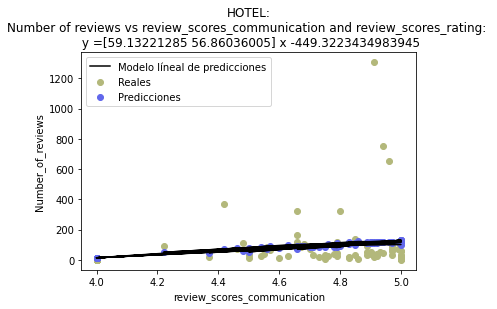

In [ ]:
import matplotlib.pyplot as plt
x=hotelb['review_scores_communication']
y=hotelb['number_of_reviews']
z= hotelb['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='HOTEL:\n' + 'Number of reviews vs review_scores_communication and review_scores_rating: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_communication")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.035214315700188736
coeficiente de Correlación 0.18765477798390515


####**PRIVATE ROOM:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_cleanliness** y **price**


**y = 61.77983868 x^2 -0.20447194 x -146.59**



In [ ]:
#Modelo matemático para cada df
Vars_Indep=privateb[['review_scores_cleanliness','price']] #para que sea df, no lista
Var_Dep=privateb['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=privateb[['review_scores_cleanliness','price']])
privateb.insert(0, 'Predicciones', y_pred)
privateb.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness', 'price'], dtype=object), 'n_features_in_': 2, 'coef_': array([61.77983868, -0.20447194]), '_residues': 33291754.304610383, 'rank_': 2, 'singular_': array([5234.66240148,   15.30629365]), 'intercept_': -146.5996910848102}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,152.280377,1.00,Private room,49,14,305,4.89,5.00,4.98
1,127.651710,0.98,Private room,106,0,339,4.44,4.79,4.62
2,131.402326,1.00,Private room,136,121,231,4.94,4.95,4.92
3,140.168324,1.00,Private room,75,117,428,4.88,4.89,4.94
4,141.168771,1.00,Private room,55,160,582,4.79,4.84,4.92


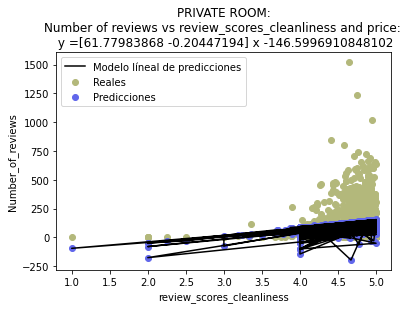

In [ ]:
import matplotlib.pyplot as plt
x=privateb['review_scores_cleanliness']
y=privateb['number_of_reviews']
z=privateb['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='PRIVATE ROOM:\n' + 'Number of reviews vs review_scores_cleanliness and price: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_cleanliness")
plt.legend()
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.06441630527685138
coeficiente de Correlación 0.2538036746716867


##**Ciudad 3: Hovedstaden, Dinamarca**

###Importación de Librerías y Creación de Df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
dfd=pd.read_excel('listingsd.xlsx')
dfd.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip NÃ¸rrebro ...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÃ†DE - located in the a...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13



###**Preprocesamiento**

* Nulos y outliers

In [ ]:

dfd=dfd.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],axis=1)
dfd.head()


,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,0.58,Entire home/apt,898,0,172,4.78,4.78,4.89
1,0.31,Entire home/apt,2600,303,59,4.91,4.96,4.86
2,0.95,Entire home/apt,3250,56,300,4.53,4.44,4.70
3,0.33,Entire home/apt,725,59,24,4.92,4.73,5.00
4,1.00,Entire home/apt,1954,0,19,4.88,4.88,4.82


In [ ]:
dfd.info()                #Observamos que tenemos nulos
dfd=dfd.fillna({'host_acceptance_rate':int(dfd['host_acceptance_rate'].mean()),'review_scores_rating':int(dfd['review_scores_rating'].mean()),'review_scores_cleanliness':int(dfd['review_scores_cleanliness'].mean()),'review_scores_communication':int(dfd['review_scores_communication'].mean())})
print(len(dfd)-dfd.count())                #Confirmamos que no tenemos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         12091 non-null  float64
 1   room_type                    13815 non-null  object 
 2   price                        13815 non-null  int64  
 3   availability_365             13815 non-null  int64  
 4   number_of_reviews            13815 non-null  int64  
 5   review_scores_rating         12170 non-null  float64
 6   review_scores_cleanliness    12127 non-null  float64
 7   review_scores_communication  12127 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 863.6+ KB
host_acceptance_rate           0
room_type                      0
price                          0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_com

* Outliers.

Observando el box plot nos percatamos que no tenemos valores atípicos más que en las variables de precio,y numero de reviews, y al tratarse de variables que puede variar los precios y reseñas dependiendo el tipo de cuarto, vamos a omitir estos datos, y trabajaremos con el dataset normal.  

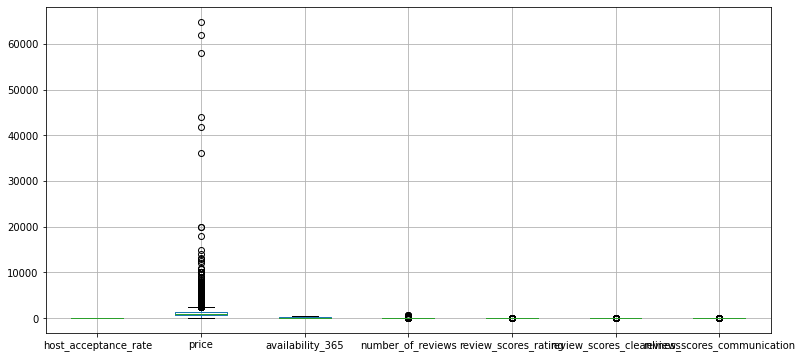

In [ ]:
dfd.boxplot(figsize=(13,6))

In [ ]:
#Creamos los 4 Dt de acuerdo al tipo de cuarto. 
aptd=dfd[dfd['room_type'] == "Entire home/apt"] 
privated=dfd[dfd['room_type'] == "Private room"] 
hoteld=dfd[dfd['room_type'] == "Hotel room"] 
sharedd=dfd[dfd['room_type'] == "Shared room"] 


###**Correlaciones y Gráficos**

####ENTIRE HOME/ APT

In [ ]:

column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=aptd[[i]] #para que sea df, no lista
  Var_Dep=aptd['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print() 

Coeficiente de determinación de:  availability_365
0.0031
Coeficiente de correlación: 
0.0553

Coeficiente de determinación de:  review_scores_rating
0.0134
Coeficiente de correlación: 
0.1159

Coeficiente de determinación de:  price
0.0001
Coeficiente de correlación: 
0.0112

Coeficiente de determinación de:  host_acceptance_rate
0.0164
Coeficiente de correlación: 
0.1281

Coeficiente de determinación de:  review_scores_cleanliness
0.0174
Coeficiente de correlación: 
0.1319

Coeficiente de determinación de:  review_scores_communication
0.0265
Coeficiente de correlación: 
0.1628



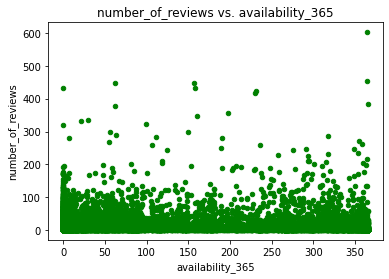

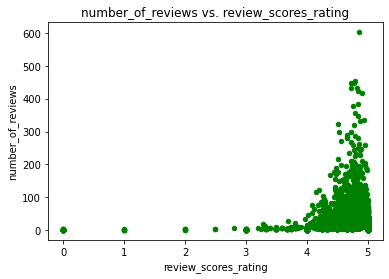

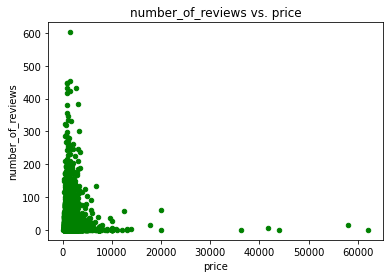

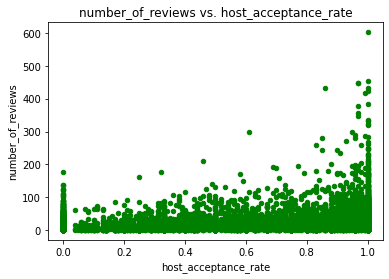

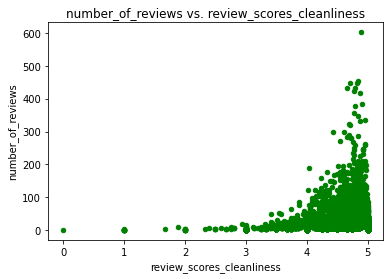

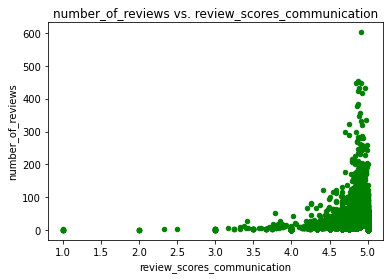

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  aptd.plot.scatter(x=i,y='number_of_reviews',c='green')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)


####PRIVATE ROOM

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=privated[[i]] #para que sea df, no lista
  Var_Dep=privated['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.0005
Coeficiente de correlación: 
0.0217

Coeficiente de determinación de:  review_scores_rating
0.014
Coeficiente de correlación: 
0.1183

Coeficiente de determinación de:  price
0.0007
Coeficiente de correlación: 
0.0268

Coeficiente de determinación de:  host_acceptance_rate
0.0423
Coeficiente de correlación: 
0.2057

Coeficiente de determinación de:  review_scores_cleanliness
0.0262
Coeficiente de correlación: 
0.1619

Coeficiente de determinación de:  review_scores_communication
0.0306
Coeficiente de correlación: 
0.1748



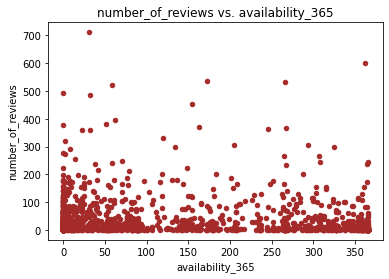

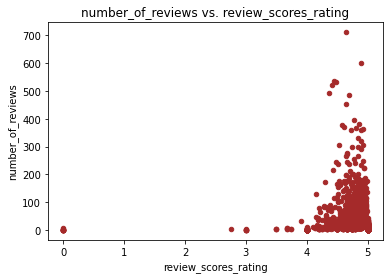

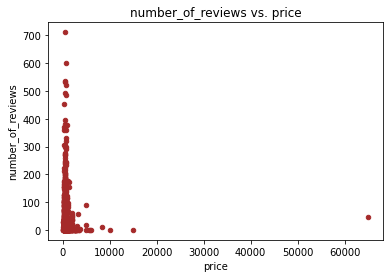

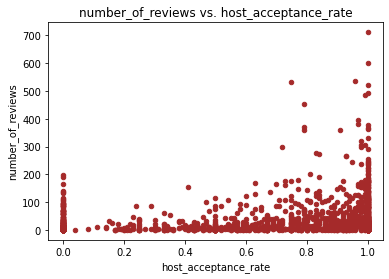

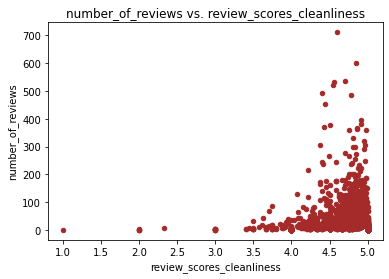

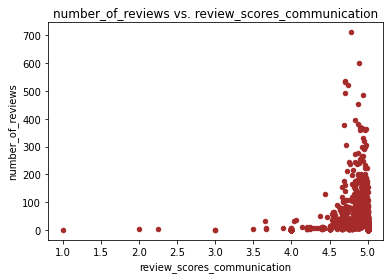

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  privated.plot.scatter(x=i,y='number_of_reviews',c='brown')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)


####HOTEL

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=hoteld[[i]] #para que sea df, no lista
  Var_Dep=hoteld['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.005
Coeficiente de correlación: 
0.0706

Coeficiente de determinación de:  review_scores_rating
0.0018
Coeficiente de correlación: 
0.0422

Coeficiente de determinación de:  price
0.2122
Coeficiente de correlación: 
0.4607

Coeficiente de determinación de:  host_acceptance_rate
0.0019
Coeficiente de correlación: 
0.0431

Coeficiente de determinación de:  review_scores_cleanliness
0.1343
Coeficiente de correlación: 
0.3664

Coeficiente de determinación de:  review_scores_communication
0.0044
Coeficiente de correlación: 
0.0662



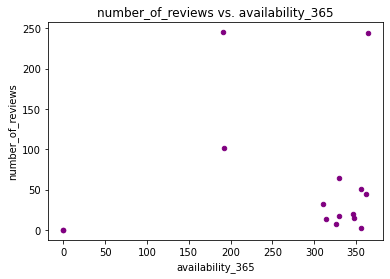

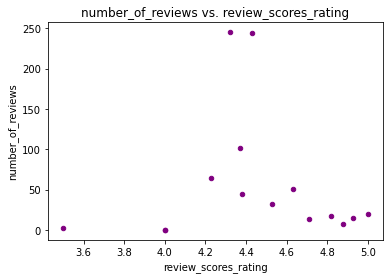

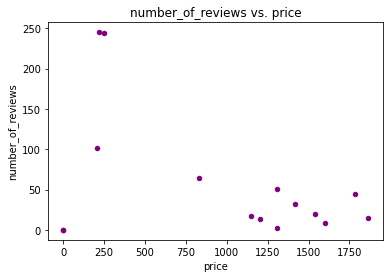

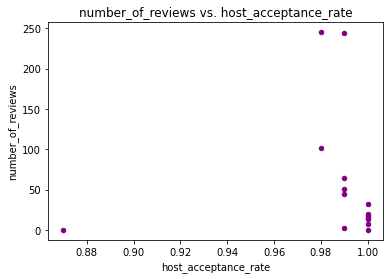

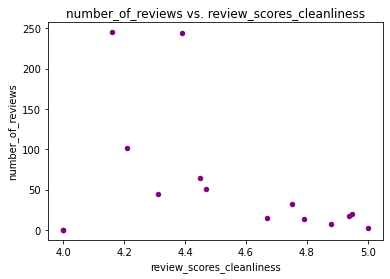

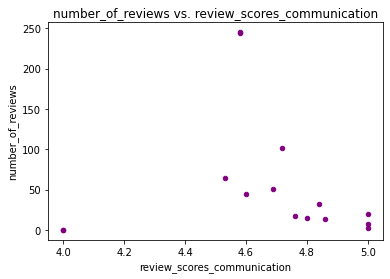

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  hoteld.plot.scatter(x=i,y='number_of_reviews',c='purple')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)

####SHARED ROOM

In [ ]:
column=['availability_365','review_scores_rating','price','host_acceptance_rate',	'review_scores_cleanliness','review_scores_communication']
for i in column:
  print('Coeficiente de determinación de: ', i)
  Vars_Indep=sharedd[[i]] #para que sea df, no lista
  Var_Dep=sharedd['number_of_reviews']
  #Se define modelo con función de regresión lineal
  from sklearn.linear_model import LinearRegression
  model=LinearRegression()
  #type(model) #Para comprobar que si esata el modelo
  model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
  cd=model.score(Vars_Indep,Var_Dep) #Coeficiente de determinación
  print(round(cd,4))
  print('Coeficiente de correlación: ') #Coeficiente de correlación
  cc=math.sqrt(cd)
  print(round(cc,4))
  print()

Coeficiente de determinación de:  availability_365
0.1788
Coeficiente de correlación: 
0.4228

Coeficiente de determinación de:  review_scores_rating
0.0333
Coeficiente de correlación: 
0.1825

Coeficiente de determinación de:  price
0.0502
Coeficiente de correlación: 
0.2241

Coeficiente de determinación de:  host_acceptance_rate
0.2322
Coeficiente de correlación: 
0.4818

Coeficiente de determinación de:  review_scores_cleanliness
0.0189
Coeficiente de correlación: 
0.1376

Coeficiente de determinación de:  review_scores_communication
0.0497
Coeficiente de correlación: 
0.2229



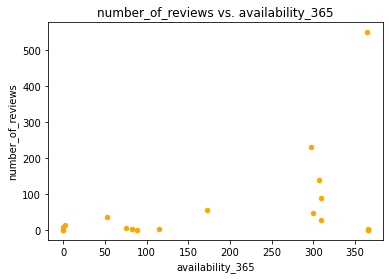

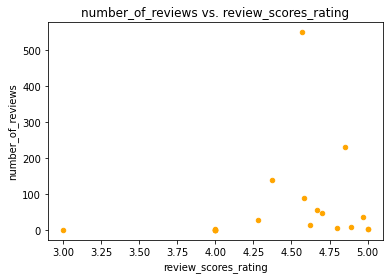

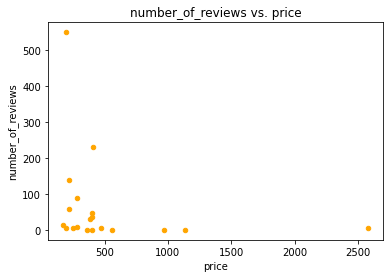

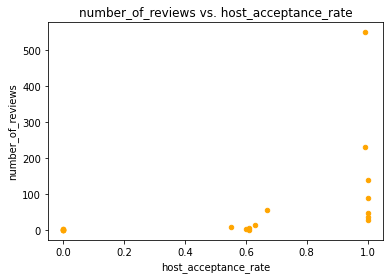

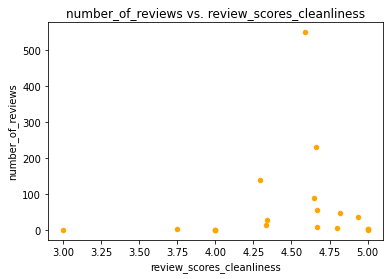

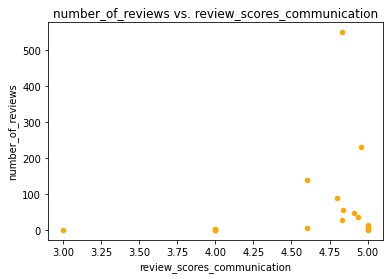

In [ ]:
#GRÁFICOS DE DISPERSIÓN
%matplotlib inline
for i in column:
  sharedd.plot.scatter(x=i,y='number_of_reviews',c='orange')
  titulo='number_of_reviews vs. ' + i
  plt.title(titulo)

###**Modelo matemático**

####**Entire Room/apt:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **'review_scores_cleanliness** y **review_scores_communication'**


**y = 3.4538986 x^2 +10.47825883 x - 49.96**

In [ ]:
#Modelo matemático para cada df
Vars_Indep=aptd[['review_scores_cleanliness','review_scores_communication']] #para que sea df, no lista
Var_Dep=aptd['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=aptd[['review_scores_cleanliness','review_scores_communication']])
aptd.insert(0, 'Predicciones', y_pred)
aptd.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_communication'],
      dtype=object), 'n_features_in_': 2, 'coef_': array([ 3.4538986 , 10.47825883]), '_residues': 10234682.48315417, 'rank_': 2, 'singular_': array([56.74129438, 27.09533606]), 'intercept_': -49.966938216758365}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,17.781383,0.58,Entire home/apt,898,0,172,4.78,4.78,4.89
1,18.088737,0.31,Entire home/apt,2600,303,59,4.91,4.96,4.86
2,14.616188,0.95,Entire home/apt,3250,56,300,4.53,4.44,4.70
3,18.761296,0.33,Entire home/apt,725,59,24,4.92,4.73,5.00
4,17.393295,1.00,Entire home/apt,1954,0,19,4.88,4.88,4.82


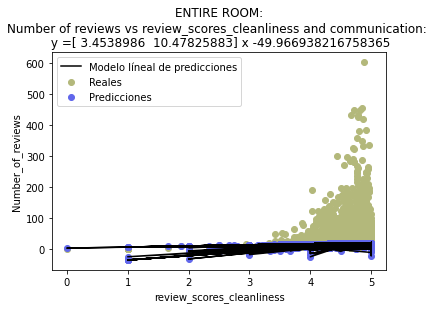

In [ ]:
import matplotlib.pyplot as plt
x=aptd['review_scores_cleanliness']
y=aptd['number_of_reviews']
z= aptd['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='ENTIRE ROOM:\n' +'Number of reviews vs review_scores_cleanliness and communication: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_cleanliness")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.028109376152052223
coeficiente de Correlación 0.1676585105267616


####**PRIVATE ROOM:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_communication** y **host_acceptance_rate**


**y = 25.54848417 x^2 + 32.08335162 x  -106.97**


In [ ]:
#Modelo matemático para cada df
Vars_Indep=privated[['review_scores_communication','host_acceptance_rate']] #para que sea df, no lista
Var_Dep=privated['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=privated[['review_scores_communication','host_acceptance_rate']])
privated.insert(0, 'Predicciones', y_pred)
privated.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication', 'host_acceptance_rate'],
      dtype=object), 'n_features_in_': 2, 'coef_': array([25.54848417, 32.08335162]), '_residues': 6336511.850659139, 'rank_': 2, 'singular_': array([15.98428379, 13.66932785]), 'intercept_': -106.97149989018189}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
12,50.043939,1.00,Private room,465,0,57,4.82,4.94,4.89
20,43.561920,0.79,Private room,1918,365,22,4.80,4.85,4.90
22,20.004466,0.00,Private room,500,24,95,4.98,4.96,4.97
28,20.770921,0.00,Private room,2000,143,1,4.00,3.00,5.00
29,43.050951,0.79,Private room,327,154,454,4.65,4.44,4.88


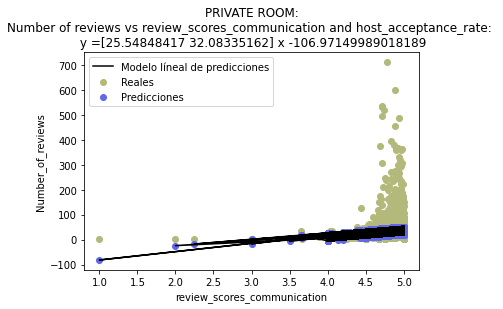

In [ ]:
import matplotlib.pyplot as plt
x=privated['review_scores_communication']
y=privated['number_of_reviews']
z=privated['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='PRIVATE ROOM:\n' + 'Number of reviews vs review_scores_communication and host_acceptance_rate: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.ylabel("Number_of_reviews")
plt.xlabel("review_scores_communication")
plt.legend()
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.06325307907928068
coeficiente de Correlación 0.25150164826354654


####**HOTEL:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **review_scores_cleanliness** y **price**


**y = -11.73924371 x^2 - 0.05119445 x +160.49**



In [ ]:
#Modelo matemático para cada df
Vars_Indep=hoteld[['review_scores_cleanliness','price']] #para que sea df, no lista
Var_Dep=hoteld['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=hoteld[['review_scores_cleanliness','price']])
hoteld.insert(0, 'Predicciones', y_pred)
hoteld.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness', 'price'], dtype=object), 'n_features_in_': 2, 'coef_': array([-11.73924371,  -0.05119445]), '_residues': 72135.04263127063, 'rank_': 2, 'singular_': array([2.50127693e+03, 8.67603950e-01]), 'intercept_': 160.49513256877924}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
1096,34.938966,0.99,Hotel room,1306,356,2,3.50,5.00,5.00
4473,42.779624,1.00,Hotel room,1201,314,14,4.71,4.79,4.86
4474,23.648817,1.00,Hotel room,1538,346,20,5.00,4.95,5.00
4711,43.680849,1.00,Hotel room,1149,330,17,4.82,4.94,4.76
5019,32.293582,1.00,Hotel room,1415,310,32,4.53,4.75,4.84


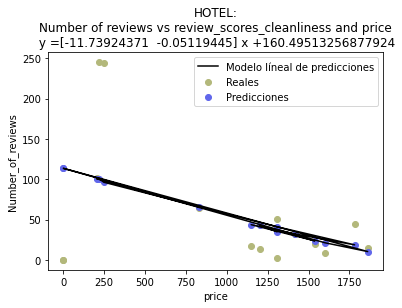

In [ ]:
import matplotlib.pyplot as plt
x=hoteld['price']
y=hoteld['number_of_reviews']
z= hoteld['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='HOTEL:\n' + 'Number of reviews vs review_scores_cleanliness and price\n '+ 'y ='+str(l[7])+' x +'+ str(l[11])
plt.title(Titulo)
plt.legend()
plt.ylabel("Number_of_reviews")
plt.xlabel("price")
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.21333200567299304
coeficiente de Correlación 0.4618787781149866


####**SHARED ROOM:**
Variable escogida (mayor correlación) con la cual obtendremos un mayor modelo: **availability_365** y **host_acceptance_rate**


**y = 0.31220296 x^2 + 130.55609437 x - 67.84**



In [ ]:
#Modelo matemático para cada df
Vars_Indep=sharedd[['availability_365','host_acceptance_rate']] #para que sea df, no lista
Var_Dep=sharedd['number_of_reviews']
#Se define modelo con función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#type(model) #Para comprobar que si esata el modelo
model.fit(X=Vars_Indep, y=Var_Dep) #entrenar el modelo
m=model.__dict__
print(m)

#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=sharedd[['availability_365','host_acceptance_rate']]) 
sharedd.insert(0, 'Predicciones', y_pred)
sharedd.head()

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365', 'host_acceptance_rate'], dtype=object), 'n_features_in_': 2, 'coef_': array([  0.31220296, 130.55609437]), '_residues': 202987.17665789425, 'rank_': 2, 'singular_': array([624.98791121,   1.77296783]), 'intercept_': -67.84142033849344}


,Predicciones,host_acceptance_rate,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
43,46.112662,0.00,Shared room,2575,365,4,4.00,3.75,4.00
480,46.112662,0.00,Shared room,1131,365,1,3.00,5.00,3.00
503,46.112662,0.00,Shared room,972,365,1,4.00,3.00,5.00
530,15.033325,0.63,Shared room,174,2,14,4.62,4.33,5.00
841,73.642276,0.67,Shared room,223,173,57,4.67,4.67,4.84


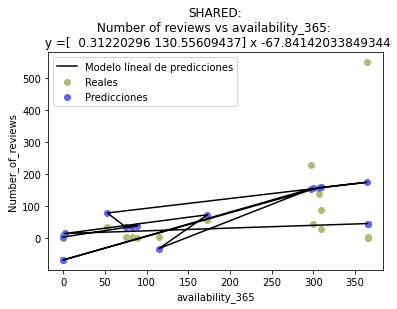

In [ ]:
import matplotlib.pyplot as plt
x=sharedd['availability_365']
y=sharedd['number_of_reviews']
z= sharedd['Predicciones']

plt.scatter(x,y,c='#B3B87B',label='Reales') 
plt.scatter(x,z,c='#6167EB',label='Predicciones')
plt.plot(x,z,label='Modelo líneal de predicciones', color='black') 

l=list(m.values()) #Cambio el formato de diccionario a lista de 'model.__dict__' para poder manipular cada elemento
Titulo='SHARED:\n' + 'Number of reviews vs availability_365: \n '+ 'y ='+str(l[7])+' x '+ str(l[11])
plt.title(Titulo)
plt.ylabel("Number_of_reviews")
plt.xlabel("availability_365")
plt.legend()
plt.show()

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print('coeficiente de Determinación',coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print('coeficiente de Correlación',coef_Correl)

coeficiente de Determinación 0.3502830235260599
coeficiente de Correlación 0.5918471285104456
